# devlog 2024-07-18

A simple demo of ADRIOs "version 2".

In [1]:
import epymorph.geo.adrio.acs5 as acs5
import epymorph.geo.adrio.us_tiger as tiger
from epymorph import *
from epymorph.geography.us_census import StateScope
from epymorph.rume import SingleStrataRume
from epymorph.simulator.data import evaluate_param

# Look ma, no geo!

rume = SingleStrataRume.build(
    ipm=ipm_library['sirs'](),
    mm=mm_library['centroids'](),
    init=init.SingleLocation(location=0, seed_size=10_000),
    scope=StateScope.in_states_by_code([
        'AZ', 'CO', 'NM', 'UT', 'NV', 'CA', 'OR', 'WA',
    ], year=2020),
    time_frame=TimeFrame.of("2020-01-01", 300),
    params={
        'ipm::beta': 0.4,
        'ipm::gamma': 1 / 5,
        'ipm::xi': 1 / 90,
        'mm::phi': 40.0,
        'population': acs5.Population(),
        'centroid': tiger.InternalPoint(),

        # Realistically, if I needed populations by age group, I would have a multistrata RUME,
        # but this is just for demonstrating these ADRIOs work...
        'population_by_age_table': acs5.PopulationByAgeTable(),
        'population_00-19': acs5.PopulationByAge(0, 19),
        'population_20-59': acs5.PopulationByAge(20, 59),
        'population_60-79': acs5.PopulationByAge(60, 79),
        'geo::label': tiger.Name(),

        # Example: I can use a different definition of centroid!
        # 'centroid': tiger.GeometricCentroid(),

        # Example: I can calculate pop density (persons per km^2) by combining ADRIOs...
        # 1. get land area in m^2 from TIGER
        # 2. scale that to be in km^2
        # 3. use a generic pop density ADRIO which combines 'population' and 'land_area_km2'
        # 'land_area_km2': adrio.Scale(tiger.LandAreaM2(), factor=1e-6),
        # 'population_km2': adrio.PopulationPerKm2(),

        # Additional ACS5 attributes.
        'average_household_size': acs5.AverageHouseholdSize(),
        'dissimilarity_index': acs5.DissimilarityIndex('White', 'Native'),
        'gini_index': acs5.GiniIndex(),
        'median_age': acs5.MedianAge(),
        'median_income': acs5.MedianIncome(),
    },
)

Evaluating Population ADRIO...
Completed Population ADRIO (2.358s).
Evaluating InternalPoint ADRIO...
Completed InternalPoint ADRIO (0.139s).
Evaluating Name ADRIO...
Completed Name ADRIO (0.085s).
Running simulation (BasicSimulator):
• 2020-01-01 to 2020-10-27 (300 days)
• 8 geo nodes
|####################| 100% 
Runtime: 0.242s


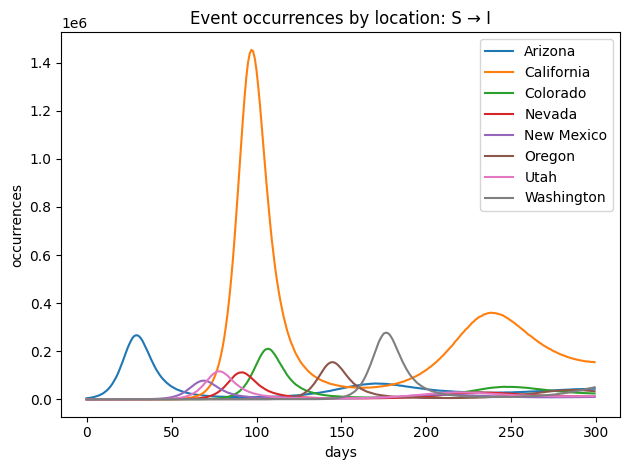

In [2]:
sim = BasicSimulator(rume)
with sim_messaging(sim):
    out = sim.run()

plot_event(out, event_idx=rume.ipm.event_by_name("S->I"))

In [3]:
# Let's check out the values of some of the attributes we didn't use in the simulation...

def show(name):
    print("\n", ">>>", name, evaluate_param(rume, name), "\n")


show('population_00-19')
show('population_20-59')
show('population_60-79')
show('average_household_size')
show('dissimilarity_index')
show('gini_index')
show('median_age')
show('median_income')

Evaluating PopulationByAgeTable ADRIO...
Completed PopulationByAgeTable ADRIO (27.622s).
Evaluating PopulationByAge ADRIO...
Completed PopulationByAge ADRIO (0.000s).

 >>> population_00-19 [1836857 9986244 1405688  753880  539036  965716 1022625 1830822] 

Evaluating PopulationByAge ADRIO...
Completed PopulationByAge ADRIO (0.000s).

 >>> population_20-59 [ 3647013 21461094  3134038  1619922  1057305  2197901  1633858  4046677] 

Evaluating PopulationByAge ADRIO...
Completed PopulationByAge ADRIO (0.000s).

 >>> population_60-79 [1398221 6476190  968900  560741  416069  847429  415591 1372944] 

Evaluating AverageHouseholdSize ADRIO...
Completed AverageHouseholdSize ADRIO (0.949s).

 >>> average_household_size [2.65 2.94 2.6  2.65 2.59 2.49 3.09 2.53] 

Evaluating DissimilarityIndex ADRIO...
Completed DissimilarityIndex ADRIO (2.712s).

 >>> dissimilarity_index [0.45477918 0.13515806 0.24425009 0.16504944 0.57190601 0.21115552
 0.33199027 0.24426182] 

Evaluating GiniIndex ADRIO...
Co